In [47]:
import numpy as np
from math import e
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [345]:
class Line():
    
    def create_line(self):
        self.mbs = np.random.uniform(1.0,0.0,3)
    
    def find_actual_y(self,X):
        return np.matmul(X,self.mbs.T)

    
    
class Plot:
    def plot(self, y, preds):
        plt.plot(preds,preds,"go")
        plt.plot(preds,y,"bo")
        plt.vlines(preds,preds,y, colors='k', linestyles='solid', label='')
        plt.show()
class GradientDescentLinReg(Line, Plot):
    def __init__(self,N):
        self.weights = np.array([0,0,0])
        self.n = .01
        self.N = N
        
        self.create_line()
        
        X = np.random.uniform(-1.0,1.0,(self.N,2))
        self.X = self.add_thresholdCol(X)
        self.y = self.find_actual_y(self.X)
        
        print(self.mse(self.X,self.y))
        self.run_sgd()
        #self.run_gradient_descent()
        self.eout()
        
   
        
    def run_sgd(self):
        self.num_iter = 0
        cur_wdiff = 1
        for x in range(100):
            self.num_iter += 1
            wt = self.weights
            self.sgd_epoch()
            wt1 = self.weights
           
            
        self.ein = self.mse(self.X,self.y)
    
    
    def run_gradient_descent(self):
        self.num_iter = 0
        hump = 0
        for x in range(1000):
            self.num_iter += 1
            wt = self.weights
            self.gradient_descent()
            wt1 = self.weights
            
        
        self.ein = self.mse(self.X,self.y)
        
        
        
####################################################
        
    def sgd_gradient(self,x,y):
        w = self.weights
        return (y-np.matmul(x,w))*-x*2
    
    
    def gradient(self):
        w = self.weights
        return -np.matmul((self.y-np.matmul(self.X,w)),self.X)*2/self.N
         
    
####################################################
    
    
    def gradient_descent(self):
        gradient = -self.n *self.gradient()
        self.weights = self.weights + gradient 
        
    def sgd_epoch(self):
        vals = list(range(self.N))
        random.shuffle(vals)
        for v in vals:
            gradient = -self.n *self.sgd_gradient(self.X[v],self.y[v])
            self.weights = self.weights + gradient  
    
    
######################################################
    
    def mse(self,X,y):
        w = self.weights
        return sum((self.calc(X)-y)**2)/self.N
    def calc(self,X):
        w = self.weights
        return np.matmul(X,w.T)
    def add_thresholdCol(self,X):
        return np.concatenate([[[1]for x in range(len(X))],X],axis=1)
    def eout(self):
        X = np.random.uniform(-1.0,1.0,(100,2))
        X = self.add_thresholdCol(X)
        y = self.find_actual_y(X)
        self.eout = self.mse(X,y)
        preds = self.calc(X)
        self.plot(y,preds)



In [346]:
class run_experiment():
    def __init__(self,N, numEx):
        self.N = N
        self.numEx = numEx
        self.run() 
    def run(self):
        eouts = []
        eins = []
        num_iters = []
        for x in range(self.numEx):
            test = GradientDescentLinReg(self.N)
            eouts.append(test.eout)
            eins.append(test.ein)
            num_iters.append(test.num_iter)
        Eout = np.mean(eouts)
        NumIter = np.mean(num_iters)
        Ein = np.mean(eins)
        print("Eout Error %s" % Eout)
        print("Ein Error %s" % Ein)
        print("Num Iterations %s" % NumIter) 
           
            
            

0.44493339534717286


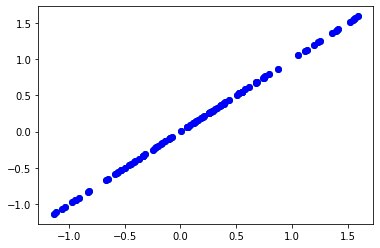

Eout Error 1.5844856764067117e-30
Ein Error 1.2596737394259156e-30
Num Iterations 100.0


In [347]:
obj = run_experiment(100,1)

In [40]:
i = random.shuffle([1,2])

In [88]:
np.linalg.norm([1,2])

2.23606797749979

In [35]:
cur_idxs = np.arange(3)


In [113]:
np.sqrt(3)

1.7320508075688772

In [348]:
class Line():
    
    def create_line(self):
        self.rm1, self.rm2, self.rb = np.random.uniform(1.0,0.0,3)
    
    def find_actual_y(self,X):
        return X[:,0]*self.rm1 + X[:,1]*self.rm2 + self.rb


    
    
class Plot:
    def plot(self, y, preds):
        plt.plot(preds,preds,"go")
        plt.plot(preds,y,"bo")
        plt.vlines(preds,preds,y, colors='k', linestyles='solid', label='')
        plt.show()
class GradientDescentLinReg(Line, Plot):
    def __init__(self,N):
        self.m1, self.m2, self.b = 0,0,0
        self.n = .01
        self.N = N

        self.create_line()
        
        self.X = np.random.uniform(-1.0,1.0,(self.N,2))
        self.y = self.find_actual_y(self.X)
        
        print(self.mse(self.X,self.y))
        self.run_sgd()
        #self.run_gradient_descent()
        self.eout()
        
   
        
    def run_sgd(self):
        for x in range(1000):
            self.sgd_epoch() 
        self.ein = self.mse(self.X,self.y)
    
    
    def run_gradient_descent(self):
    
        for x in range(1000):
            self.gradient_descent()

        self.ein = self.mse(self.X,self.y)
        
        
        
####################################################
        
   
    
    def sgd_gradient(self,m,x,y):
        return -(y-self.calc1(x))*x[m]*2/self.N
    
    def sgd_bgradient(self,x,y):
        return -y-self.calc1(x)*2/self.N
    
    def gradient(self,m):
        return -np.matmul((self.y-self.calc(self.X)),self.X[:,m])*2/self.N
    
    def bgradient(self):
        return -np.sum(self.y-self.calc(self.X))*2/self.N
         
    
####################################################
    
    
    def gradient_descent(self):
        m1gradient = -self.n *self.gradient(0)
        self.m1 = self.m1 + m1gradient 
        m2gradient = -self.n *self.gradient(1)
        self.m2 = self.m2 + m2gradient 
        bgradient = -self.n *self.bgradient()
        self.b = self.b + bgradient 
    def sgd_epoch(self):
        vals = list(range(self.N))
        random.shuffle(vals)
        for v in vals:
            x,y = self.X[v],self.y[v]
            m1gradient = -self.n *self.sgd_gradient(0,x,y)
            self.m1 = self.m1 + m1gradient 
            m2gradient = -self.n *self.sgd_gradient(1,x,y)
            self.m2 = self.m2 + m2gradient 
            bgradient = -self.n *self.bgradient()
            self.b = self.b + bgradient 
            
    
######################################################
    
    def mse(self,X,y):
        return sum((self.calc(X)-y)**2)/self.N
    def calc(self,X):
        return np.sum([X[:,0]*self.m1,X[:,1]*self.m2],axis=0) + self.b + self.b
    
    def calc1(self,x):
        return np.sum([x[0]*self.m1,x[1]*self.m2],axis=0) + self.b + self.b
   
    def eout(self):
        X = np.random.uniform(-1.0,1.0,(100,2))
        y = self.find_actual_y(X)
        self.eout = self.mse(X,y)
        preds = self.calc(X)
        self.plot(y,preds)



0.49804861309235526


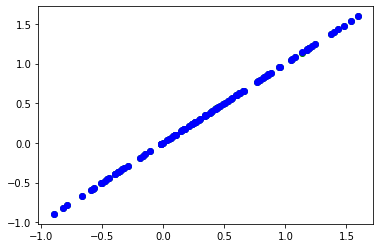

In [349]:
 i = GradientDescentLinReg(100)